# Purpose

Summarise forecasting results in business terms and demonstrate how return and volatility forecasts inform practical risk and decision-making.

# Imports

In [6]:
import pandas as pd
import numpy as np
from IPython.display import Image, display

# Returns

## Accuracy comparison

In [7]:
return_results = pd.read_csv("../outputs/tables/return_model_comparison.csv")
return_results

,Model,MAE,RMSE
0,Baseline Mean,0.008104,0.011026
1,ARIMA,0.008264,0.011158


No material improvement over baseline at a daily horizon, consistent with return noise dominating signal.

## Visual comparison

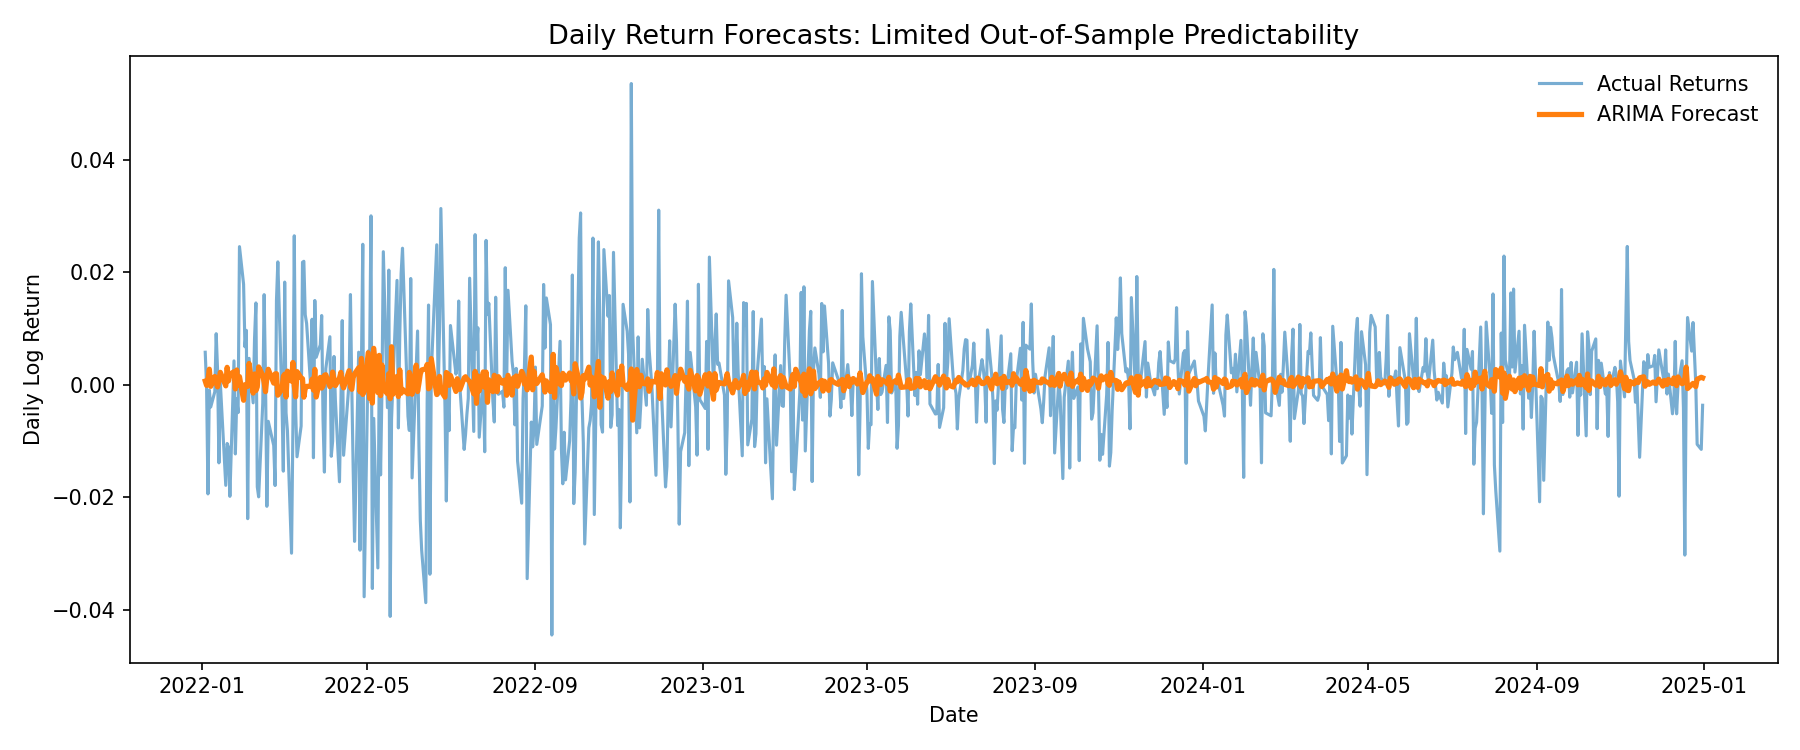

In [8]:
display(Image(filename='../outputs/figures/return_forecast_comparison.png'))

Forecasts collapse toward zero, highlighting the dominance of noise over signal.

Out-of-sample predictability of daily returns is negligible.

## Interpretation

Forecasts should not be relied upon for directional trading decisions.

For an equity portfolio, daily return forecasts at this horizon are unlikely to generate reliable excess returns after transaction costs.

The fact that ARIMA underperforms or matches the mean benchmark is exactly what market efficiency predicts.

# Volatility

## Accuracy comparison

In [9]:
vol_results = pd.read_csv("../outputs/tables/volatility_model_comparison.csv")
vol_results

,Model,MAE,RMSE
0,Naive Volatility,0.000351,0.000592
1,ETS,0.000351,0.000592
2,GARCH,0.001493,0.002026


Naive benchmark assumes volatility follows a random walk: σ̂ₜ = σₜ₋₁. 

At a one-day horizon, ETS collapses to a persistence-driven forecast similar to a random walk, resulting in identical error metrics.

GARCH forecasts conditional variance, while realised volatility is a smoothed backward-looking measure. 

Metric mismatch penalises GARCH despite its superior responsiveness to shocks. 

## Visual comparison

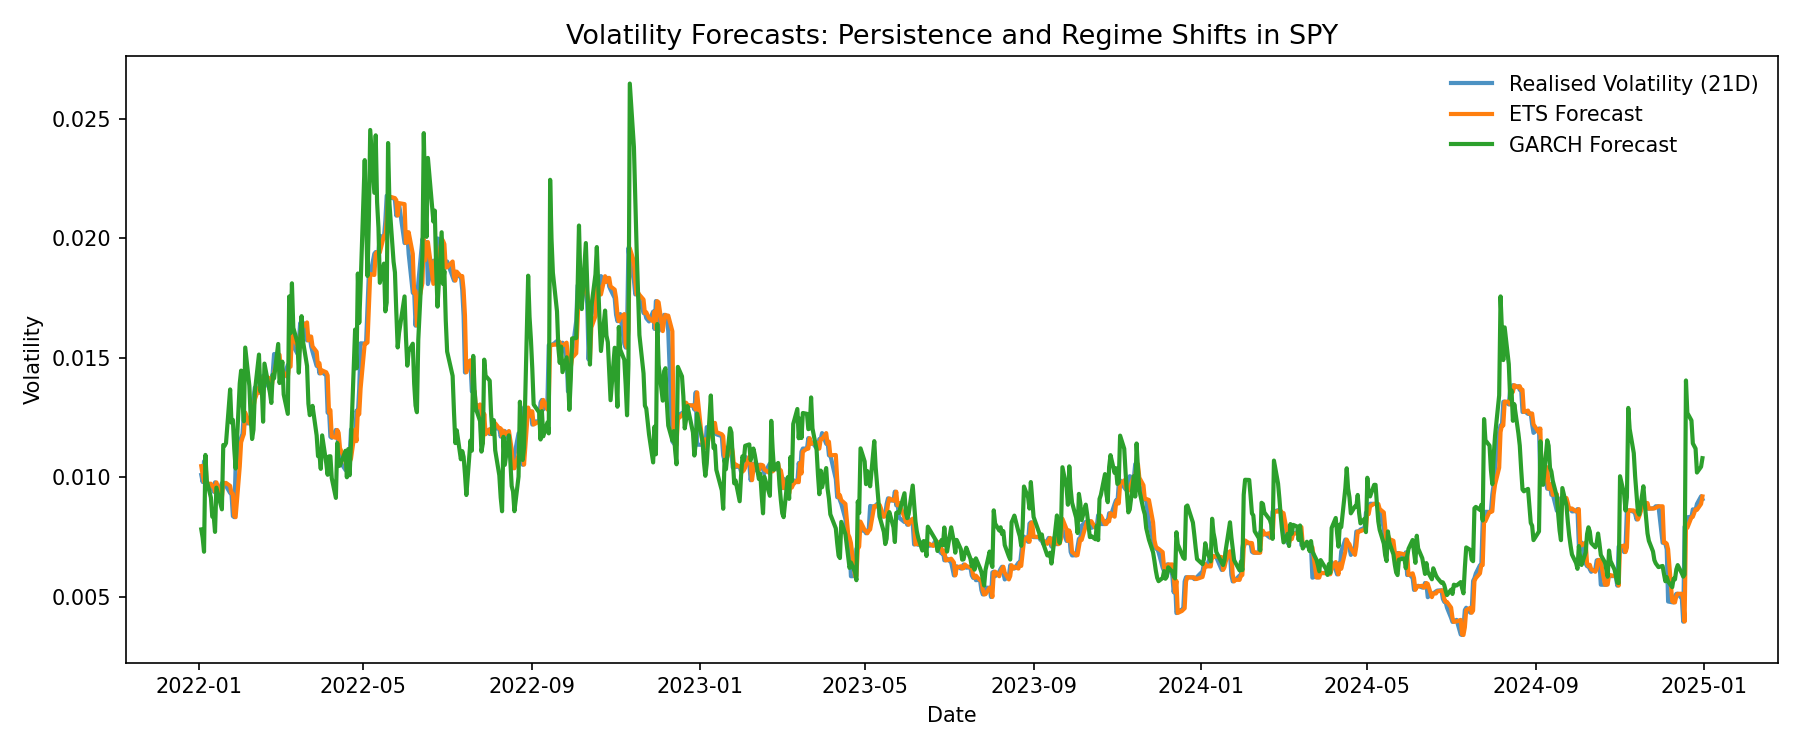

In [10]:
display(Image(filename='../outputs/figures/volatility_forecast_comparison.png'))

Volatility is persistent, not random.

Both ETS and GARCH capture the level of volatility far better than any return model captures direction.

However,

ETS behaves like a smoother:

+ Excellent at tracking medium-term regimes

+ Low noise, high stability

+ Lags during sudden jumps, but doesn’t overreact

GARCH behaves like a shock detector:

+ Responds immediately to large return shocks.

+ Captures clustering and conditional heteroskedasticity.

+ Noisier and less accurate in RMSE terms because it forecasts risk, not smooth averages.

## Interpretation

Volatility is forecastable in structure, even if not precisely timed.

These forecasts are suitable for risk limits, position sizing, stress testing, and capital allocation.

GARCH captures conditional variance dynamics not visible in smoothing models, which is valuable for modelling conditional variance dynamics relevant to risk management.

# Conclusion

Return forecasts show limited value for predicting direction, not suitable for directional trading at a daily horizon.

Volatility models reveal persistent risk dynamics directly usable for risk monitoring and volatility-aware decision frameworks. 

Different models suit different tasks: smoothing helps short-term views, conditional variance modelling supports risk control.

# Limitations

+ Single asset, may not generalise

+ One-step forecasting horizon

+ GARCH assumes normal errors (could be extended)

+ Realised volatility is backward-looking

+ Transaction costs and implementability are not considered

+ Forecasts are evaluated statistically, not within a full portfolio or P&L simulation